In [1]:
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC

from preprocess_function import preprocessing
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [2]:
# df = pd.read_csv('dataset.csv')

In [3]:
# df['comment'] = df['comment'].map(preprocessing)

In [4]:
# final_df = data_agumentation(df)

In [5]:
# final_df

In [6]:
# df.to_csv('dataset.csv',index=False)

In [7]:
# df.isnull().sum()

In [8]:
df = pd.read_csv('dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56076 entries, 0 to 56075
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   comment  56076 non-null  object
 1   label    56076 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 876.3+ KB


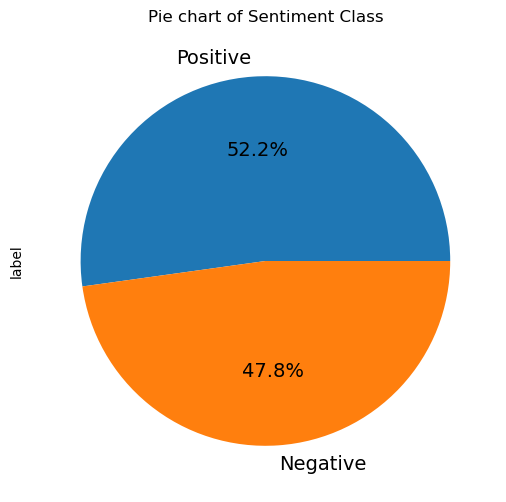

In [9]:
df2=df.copy(deep=True)
pie1=pd.DataFrame(df['label'].replace(0,'Positive').replace(1,'Negative').value_counts())
pie1.reset_index(inplace=True)
pie1.plot(kind='pie', title='Pie chart of Sentiment Class',y = 'label', 
          autopct='%1.1f%%', shadow=False, labels=pie1['index'], legend = False, fontsize=14, figsize=(8,6));

In [10]:
X_train, X_test, y_train, y_test = train_test_split(df.comment, df.label, test_size=0.2, random_state=42)

In [11]:
stop_words = (u'rằng',u'thì',u'là',u'mà',u'và')

In [12]:
steps = []
steps.append(('CountVectorizer', CountVectorizer(ngram_range=(1,3), stop_words=stop_words, min_df=1)))
steps.append(('tfidf', TfidfTransformer(use_idf=True, sublinear_tf = True, norm='l2', smooth_idf=True)))
steps.append(('model', LinearSVC(fit_intercept = False,multi_class='crammer_singer', C=0.5)))

clf = Pipeline(steps)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

#REPORT
report = metrics.classification_report(y_test, y_pred, labels=[1,0], digits=3, output_dict=True)
df_report = pd.DataFrame(report).transpose()
df_report

,precision,recall,f1-score,support
1,0.869876,0.848708,0.859162,5301.000000
0,0.867306,0.886221,0.876662,5915.000000
accuracy,0.868491,0.868491,0.868491,0.868491
macro avg,0.868591,0.867465,0.867912,11216.000000
weighted avg,0.868521,0.868491,0.868391,11216.000000


In [13]:
# CROSS VALIDATION
cross_score = cross_val_score(clf, X_train,y_train, cv=5)
print("CROSS-VALIDATION 5 FOLDS: %0.3f" % (cross_score.mean()))

CROSS-VALIDATION 5 FOLDS: 0.862


In [14]:
list_cmt = ['Áo đẹp nhưng hơi rộng so với em tưởng,65kg vẫn mặc được nhé mn','Đeo cả thág h ms đánh giá đẹp rẻ do vs giá. Giao cucg nhanh. Dép đẹp lắm nha mn ơi','Coi vì mê rock chứ cốt dở thật sự']
test_list = []
for document in list_cmt:
    document = preprocessing(str(document))
    test_list.append(document)
    
pred = clf.predict(test_list)
for i in range(3):
    print(test_list[i]," ",end="")
    print(pred[i])

áo đẹp nhưng hơi rộng so với em tưởng không vẫn mặc được nhé mọi người positive positive  0
đeo cả thág h ms đánh_giá đẹp rẻ do với giá giao cucg nhanh dép đẹp lắm nha mọi người ơi positive positive  0
coi vì mê rock chứ cốt dở thật_sự nagative  1


In [15]:
text = "nhin con nay xau the"
b = preprocessing(text)
print(b)
print(text)
print(clf.predict([b]))

nhin con nay xấu the nagative
nhin con nay xau the
[1]
